In [287]:
import pandas as pd

weekly = pd.read_csv("../../data/Weekly.csv")
weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


In [288]:
weekly.corr(numeric_only=True)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


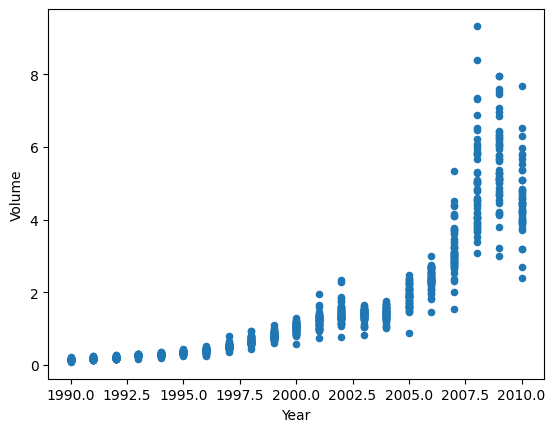

In [289]:
weekly.plot.scatter("Year", "Volume");

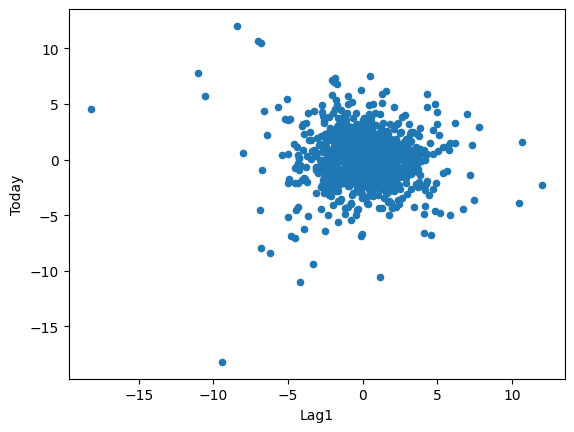

In [290]:
weekly.plot.scatter("Lag1", "Today");

There appears to be no significant relationships between the predictors. The covariance matrix indicates that, aside from the strong correlation between Year and Volume, no other substantial correlations exist among the variables. Plotting Volume against Year reveals an exponential increase in volume over time. Additionally, to assess whether there is any relationship between lag variables and the direction of today's returns, we plotted Lag1 against Today. The resulting scatterplot showed no discernible pattern, providing further evidence that there is no meaningful relationship between past and current returns.

In [291]:
import statsmodels.api as sm 
from ISLP.models import ModelSpec as MS 

pred = weekly.columns.drop(["Year", "Today", "Direction"])
X = MS(pred).fit_transform(weekly)
y = weekly["Direction"] == 'Up'

results = sm.GLM(y, X, family=sm.families.Binomial()).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1082
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -743.18
Date:                Wed, 23 Jul 2025   Deviance:                       1486.4
Time:                        16:32:50   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.009000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

The results from the Generalized Linear Model (GLM) regression suggest that most predictors do not have a statistically significant relationship with the target variable Direction. Out of the six predictors used (Lag1 through Lag5 and Volume), only Lag2 shows a significant effect, with a p-value of 0.030, which is below the typical 0.05 threshold. This indicates that changes in the market two days ago may have some predictive power for today's market direction.

All other predictors, including Lag1, Lag3, Lag4, Lag5, and Volume, have p-values well above 0.05, suggesting no statistically significant contribution to the model in explaining the target variable. Furthermore, the pseudo R-squared value of 0.009 indicates that the overall explanatory power of the model is very weak.

In [292]:
import numpy as np

probs = results.predict()
labels = np.array(["Down"] * weekly.shape[0])

labels[probs>0.5] = "Up"

from ISLP import confusion_table

confusion_table(labels, weekly.Direction)

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


In [293]:
correct = np.mean(labels == weekly.Direction)

print(f"{correct*100:.2f}% predictions are correct")

56.11% predictions are correct


The model predicted "Down" for 102 days (54 + 48), but only 54 of those were correct. This means the model correctly identified a down day only 52.94% of the time when it predicted "Down", and only 54 out of 484 total down days were correctly classified which is quite poor.

For "Up" predictions, the model was more reliable: out of 987 up predictions, 557 were correct, which corresponds to a true positive rate of 53.99%, but more importantly, among the actual Up days (605 in total), the model correctly predicted 557, a true positive rate of 92.06%, which is strong.

The model is heavily biased toward predicting "Up", and while its "Up" predictions are relatively accurate (high recall for "Up" class), its "Down" predictions are very unreliable. This suggests a practical strategy: trust the model when it predicts "Up", but be skeptical of its "Down" predictions.

In [294]:
train = weekly["Year"] <= 2008

weekly_train, weekly_test = weekly.loc[train], weekly.loc[~train]

X_train = MS(["Lag2"]).fit_transform(weekly_train)
X_test = MS(["Lag2"]).fit_transform(weekly_test)

y_train = weekly_train["Direction"] == "Up"
y_test = weekly_test["Direction"] == "Up"

In [295]:
def evaluate_confusion_df(confusion_df):
    # Extract values
    TP = confusion_df.loc['Up', 'Up']
    FP = confusion_df.loc['Up', 'Down']
    FN = confusion_df.loc['Down', 'Up']
    TN = confusion_df.loc['Down', 'Down']

    total = TP + FP + FN + TN
    accuracy = (TP + TN) / total if total else 0

    precision_up = TP / (TP + FP) if (TP + FP) else 0
    recall_up = TP / (TP + FN) if (TP + FN) else 0

    precision_down = TN / (TN + FN) if (TN + FN) else 0
    recall_down = TN / (TN + FP) if (TN + FP) else 0

    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision (Up): {precision_up * 100:.2f}%")
    print(f"Recall (Up): {recall_up * 100:.2f}%")
    print(f"Precision (Down): {precision_down * 100:.2f}%" if (TN + FN) else "Precision (Down): Undefined (no Down predictions)")
    print(f"Recall (Down): {recall_down * 100:.2f}%" if (TN + FP) else "Recall (Down): Undefined (no actual Down cases)")


# Logistic Regression 

In [296]:
results = sm.GLM(
    y_train,
    X_train,
    family=sm.families.Binomial()
).fit()

probs = results.predict(X_test)
labels = np.array(["Down"] * weekly_test.shape[0])

labels[probs>0.5] = "Up"

conf = confusion_table(labels, weekly_test["Direction"])
conf

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [312]:
print("Logistic Regression")
evaluate_confusion_df(conf)

Logistic Regression
Accuracy: 46.15%
Precision (Up): 58.62%
Recall (Up): 27.87%
Precision (Down): 41.33%
Recall (Down): 72.09%


# LDA

In [298]:
X_train = X_train.drop("intercept", axis=1)
X_test = X_test.drop("intercept", axis=1)

In [299]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(store_covariance=True)

lda.fit(X_train, y_train)
labels = lda.predict(X_test)

labels = np.where(labels, "Up", "Down")

conf = confusion_table(labels, weekly_test["Direction"])
conf

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [300]:
print("LDA")
evaluate_confusion_df(conf)

LDA
Accuracy: 62.50%
Precision (Up): 62.22%
Recall (Up): 91.80%
Precision (Down): 64.29%
Recall (Down): 20.93%


# QDA

In [301]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA 

qda = QDA(store_covariance=True)

qda.fit(X_train, y_train)
labels = qda.predict(X_test)

labels = np.where(labels, "Up", "Down")

conf = confusion_table(labels, weekly_test["Direction"])
conf

Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


In [302]:
print("QDA")
evaluate_confusion_df(conf)

QDA
Accuracy: 58.65%
Precision (Up): 58.65%
Recall (Up): 100.00%
Precision (Down): Undefined (no Down predictions)
Recall (Down): 0.00%


# KNN

In [303]:
from sklearn.neighbors import KNeighborsClassifier as KNN 

knn = KNN(n_neighbors=1)

knn.fit(X_train, y_train)

labels = knn.predict(X_test)
labels = np.where(labels, "Up", "Down")

conf = confusion_table(labels, weekly_test["Direction"])
conf

Truth,Down,Up
Predicted,,
Down,22,30
Up,21,31


In [304]:
print("KNN-1")
evaluate_confusion_df(conf)

KNN-1
Accuracy: 50.96%
Precision (Up): 59.62%
Recall (Up): 50.82%
Precision (Down): 42.31%
Recall (Down): 51.16%


# Naive Bayes

In [305]:
from sklearn.naive_bayes import GaussianNB as NB 

nb = NB()

nb.fit(X_train, y_train)

labels = nb.predict(X_test)
labels = np.where(labels, "Up", "Down")

conf = confusion_table(labels, weekly_test["Direction"])
conf

Truth,Down,Up
Predicted,,
Down,0,0
Up,43,61


In [306]:
print("Naive Bayes")
evaluate_confusion_df(conf)

Naive Bayes
Accuracy: 58.65%
Precision (Up): 58.65%
Recall (Up): 100.00%
Precision (Down): Undefined (no Down predictions)
Recall (Down): 0.00%


Among the models evaluated, **Logistic Regression** and **Linear Discriminant Analysis (LDA)** performed the best, each achieving an accuracy of **62.50%**. Both models demonstrated strong performance in predicting "Up" days, with a **recall of 91.80%** and **precision of 62.22%**, indicating they correctly identified most of the actual "Up" days. However, their ability to predict "Down" days was weaker, with a **recall of only 20.93%** and **precision of 64.29%**, suggesting that while relatively few "Down" days were correctly identified, the ones that were predicted as "Down" tended to be accurate.

In contrast, **Quadratic Discriminant Analysis (QDA)** and **Naive Bayes** had slightly lower accuracy at **58.65%** and failed to predict any "Down" days. This resulted in a perfect **recall of 100.00% for "Up"** but **zero recall for "Down"**, and their precision for "Down" was undefined due to the absence of such predictions. These models were entirely biased toward the majority class ("Up") and therefore lacked balance.

**K-Nearest Neighbors (KNN)** with $k=1$ performed the worst, with an accuracy of **50.96%**, close to random guessing. It had more balanced recall between the two classes—**50.82% for "Up"** and **51.16% for "Down"**—but lower precision overall, making it the least reliable model.

In summary, **Logistic Regression** and **LDA** provide the most useful predictions for this dataset, offering a reasonable balance between accuracy and class-specific performance. Other models either failed to recognize the minority class or showed poor generalization.

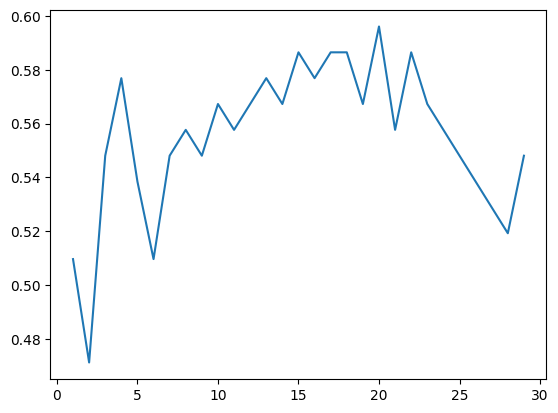

In [307]:
accuracies = []

for i in range(1, 30):
    knn = KNN(n_neighbors=i)

    knn.fit(X_train, y_train)

    labels = knn.predict(X_test)
    labels = np.where(labels, "Up", "Down")

    accuracies.append(np.mean(labels == weekly_test["Direction"]))

import matplotlib.pyplot as plt

x_knn = range(1, 30)

fig, ax = plt.subplots()

ax.plot(x_knn, accuracies);

The number of neighbors in the K-Nearest Neighbors (KNN) model has a noticeable impact on prediction accuracy, but the relationship is **non-monotonic** and not straightforward. For instance, the accuracy **dropped sharply to 40% at $K = 2$**, then **rose significantly to 58% at $K = 4$**, only to **fall again below 50% at $K = 5$**. Interestingly, the highest accuracy was observed at **$K = 18$**, just bellow 60%, suggesting that while model performance is sensitive to the choice of $K$, there isn’t a consistent trend of improvement or decline. 

After experimenting with multiple predictors and their combinations, including various lags, interaction terms, and volume, none of the resulting models demonstrated improved performance. In fact, all models that extended beyond the use of Lag2 alone resulted in significantly lower classification accuracies. This suggests that adding complexity did not enhance predictive power and may have introduced noise, reinforcing the conclusion that Lag2 remains the most effective standalone predictor in this context.